In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm
import warnings
from scipy.stats import kstest
import scipy.stats as stats

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
warnings.simplefilter('ignore')

# Data reading, cleaning and merging

In [8]:
data = pd.read_csv('../summary_data/sbt_features_tcga-luad_wxs.csv')

data = data.set_index('Sample ID')
data.shape

(558, 131)

In [9]:
feature_dict_names = {'mtDNA_dosage_norm':'mtDNA copy number', '5S_dosage_norm':'5S rDNA copy number', 
                      '18S_dosage_norm':'18S rDNA copy number', '28S_dosage_norm':'28S rDNA copy number', 
                      '45S_dosage_norm':'45S rDNA copy number', 'n_fungi_norm':'fungal load', 
                      'n_microbial_norm':'microbial load', 'n_protozoa_norm':'protozoa load', 
                      'n_viral_norm':'viral load', 'loadIG_ligth_chain_norm':'IG κ and λ infiltration', 
                      'loadIG_norm':'BCR infiltration', 'loadIGH_norm':'IGH infiltration', 
                      'loadIGK_norm':'IG κ infiltration', 'loadIGL_norm':'IG λ infiltration', 
                      'loadTCR_norm':'T cell infiltration', 'loadTCRA_norm':'T cell α infiltration', 
                      'loadTCRB_norm':'T cell β infiltration', 'loadTCRD_norm':'T cell δ infiltration',
                      'loadTCRG_norm':'T cell γ infiltration', 'nIG_ligth_chain_norm':'IG κ and λ richness', 
                      'nIG_norm':'BCR richness', 'nIGH_norm':'IGH richness', 'nIGK_norm':'IG κ richness', 
                      'nIGL_norm':'IG λ richness', 'nTCR_norm':'TCR richness', 'nTCRA_norm':'TCR α richness', 
                      'nTCRB_norm':'TCR β richness', 'nTCRD_norm':'TCR δ richness', 'nTCRG_norm':'TCR γ richness',
                      'alphaIGH':'IGH Shannon', 'alphaIGK':'IG κ Shannon', 'alphaIGL':'IG λ Shannon', 
                      'alphaTCRA':'TCR α Shannon', 'alphaTCRB':'TCR β Shannon', 'alphaTCRD':'TCR δ Shannon', 
                      'alphaTCRG':'TCR γ Shannon'}

# SBT features, covariates and outcomes

In [10]:
features = ['alphaIGH', 'alphaIGK', 'alphaIGL', 
            'alphaTCRA','alphaTCRB', 'alphaTCRD', 'alphaTCRG',
            'nIGH_norm', 'nIGL_norm', 'nIGK_norm',        
            'nTCRA_norm', 'nTCRB_norm', 'nTCRD_norm', 'nTCRG_norm',
            'loadIGH_norm', 'loadIGK_norm', 'loadIGL_norm',
            'loadTCRA_norm', 'loadTCRB_norm', 'loadTCRD_norm', 'loadTCRG_norm',               
             'mtDNA_dosage_norm', 'n_protozoa_norm',
             'n_viral_norm', 'n_fungi_norm', 'n_microbiome_norm', 
             '5S_dosage_norm',  '18S_dosage_norm',  '28S_dosage_norm',  '45S_dosage_norm']

covariates = ['offcov', 'Tumor Purity']


outcomes = [  'EGFR', 'TP53', 'KRAS', 'Sex', 'Age', 'Leukocyte Fraction','Stromal Fraction', 'Intratumor Heterogeneity', 
              'TIL Regional Fraction', 'Proliferation', 'Wound Healing', 'Macrophage Regulation', 
              'Lymphocyte Infiltration Signature Score', 'IFN-gamma Response', 'TGF-beta Response', 
              'SNV Neoantigens', 'Indel Neoantigens', 'Silent Mutation Rate', 'Nonsilent Mutation Rate', 
              'Number of Segments', 'Fraction Altered', 'Aneuploidy Score', 'Homologous Recombination Defects', 
              'BCR Evenness', 'BCR Shannon', 'BCR Richness', 'TCR Shannon', 'TCR Richness', 'TCR Evenness', 
              'CTA Score', 'Th1 Cells', 'Th2 Cells', 'Th17 Cells', 'B Cells Memory', 
              'B Cells Naive', 'Dendritic Cells Activated', 'Dendritic Cells Resting', 'Eosinophils', 
              'Macrophages M0', 'Macrophages M1', 'Macrophages M2', 'Mast Cells Activated', 
              'Mast Cells Resting', 'Monocytes', 'Neutrophils', 'NK Cells Activated', 'NK Cells Resting', 
              'Plasma Cells', 'T Cells CD4 Memory Activated', 'T Cells CD4 Memory Resting', 'T Cells CD4 Naive', 
              'T Cells CD8', 'T Cells Follicular Helper', 'T Cells gamma delta', 'T Cells Regulatory Tregs', 
              'Lymphocytes', 'Neutrophils.1', 'Eosinophils.1', 'Mast Cells', 'Dendritic Cells', 'Macrophages']

# Distribution of covariates

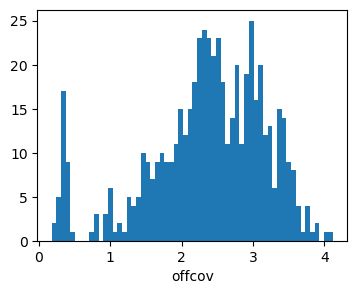

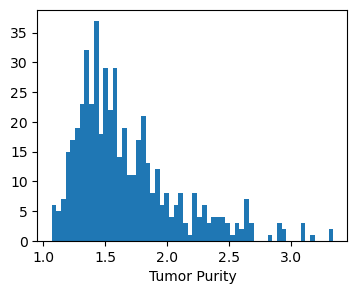

In [11]:
# number of rows
N = data.shape[0]

for column in covariates:
   
    plt.hist(1/data[column], bins=60)
    plt.xlabel(column)
    plt.show()

# Outcomes Normalization

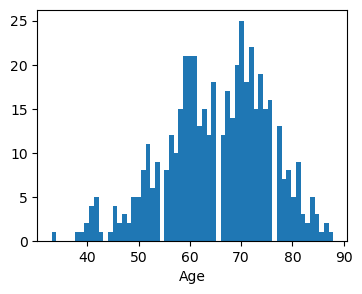

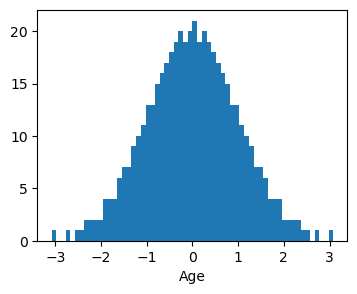

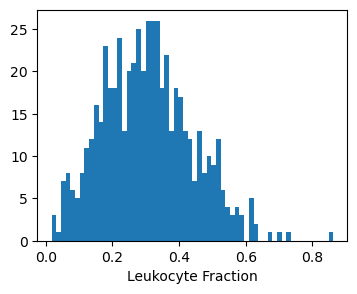

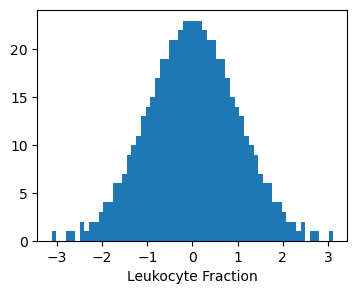

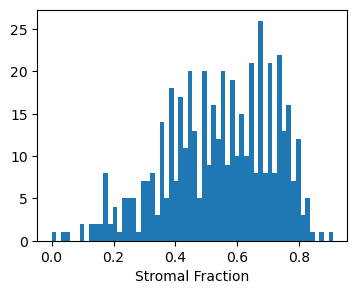

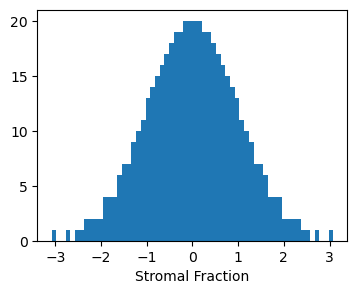

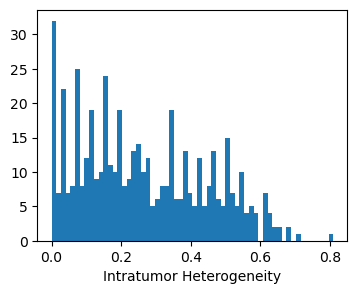

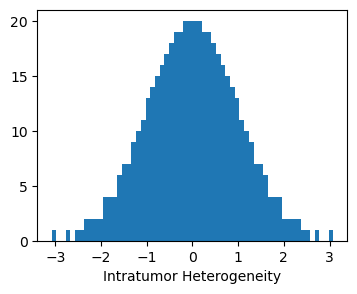

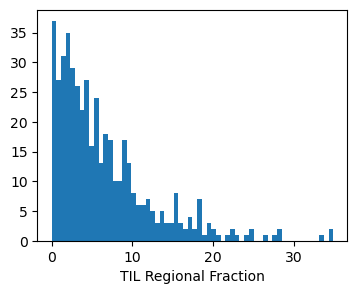

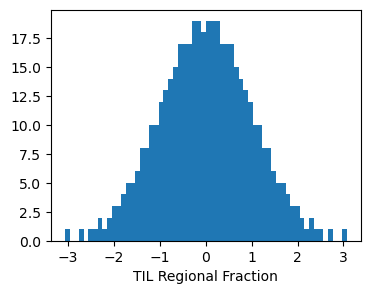

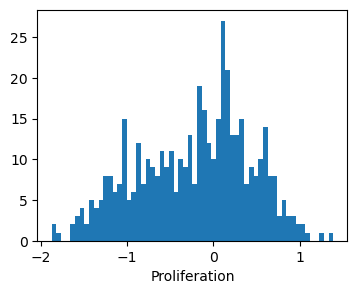

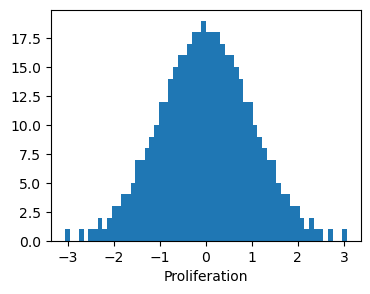

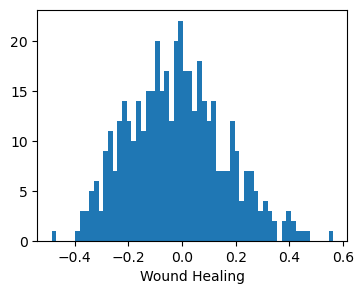

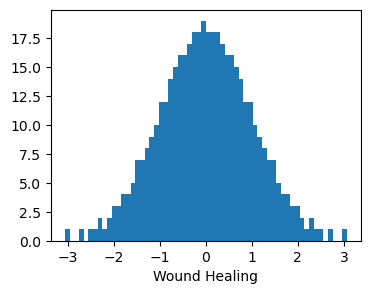

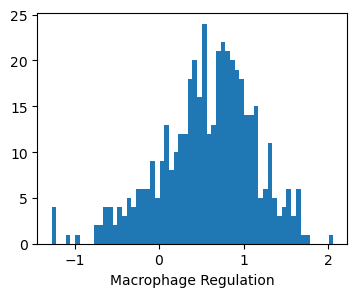

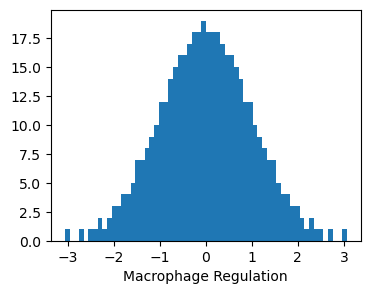

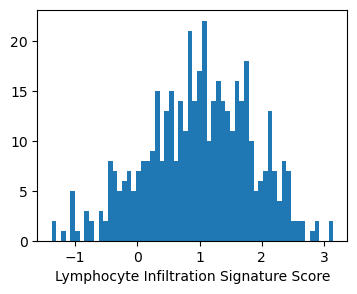

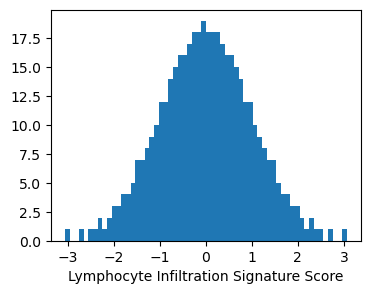

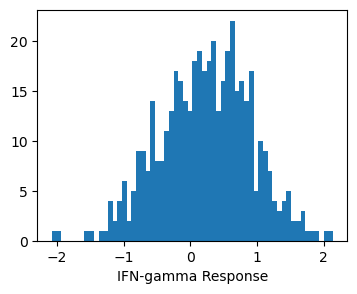

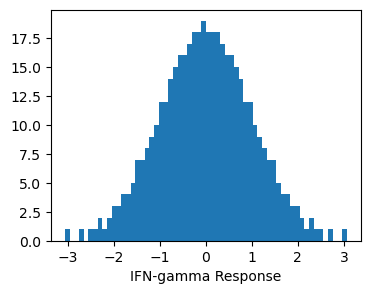

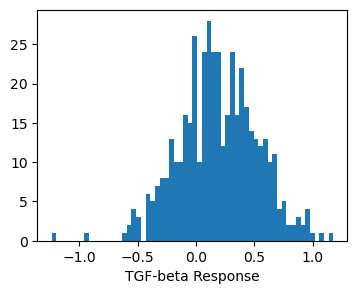

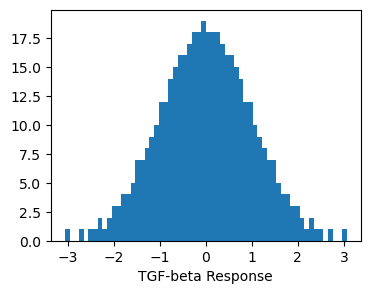

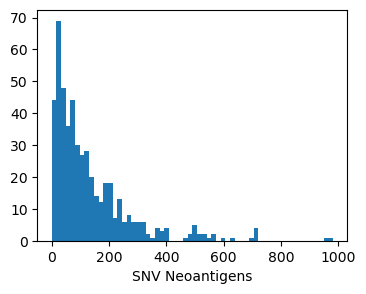

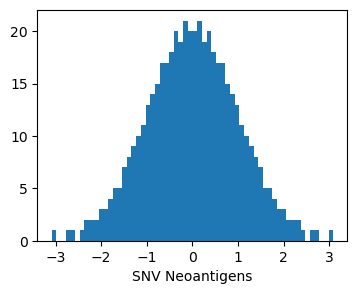

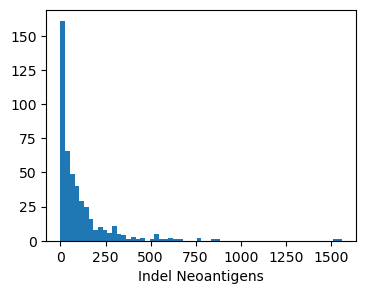

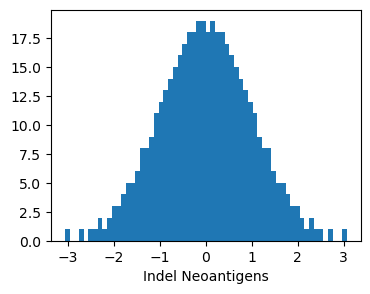

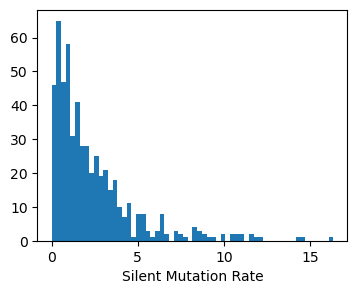

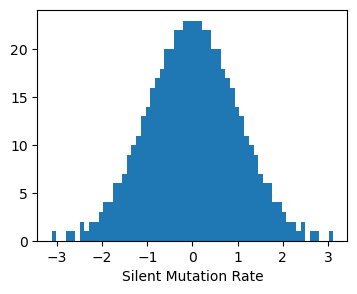

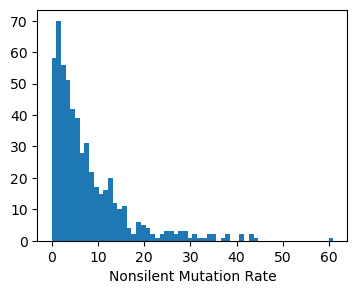

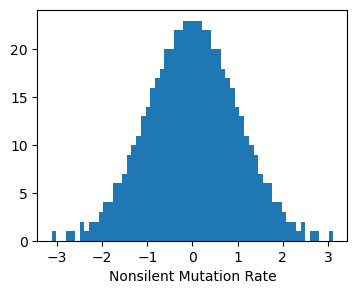

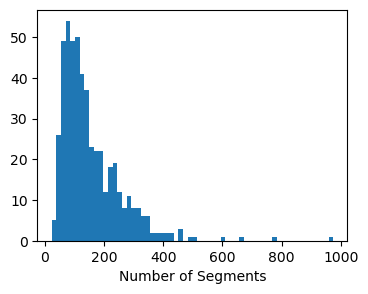

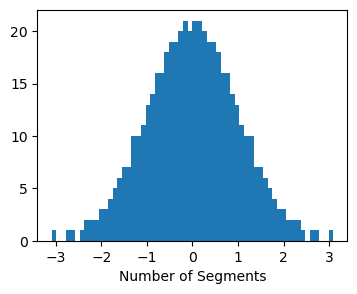

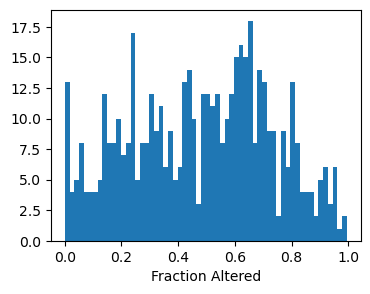

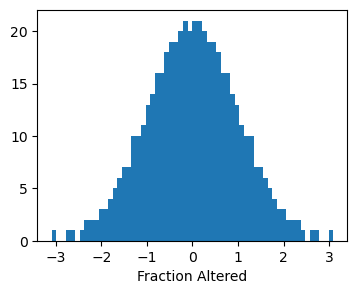

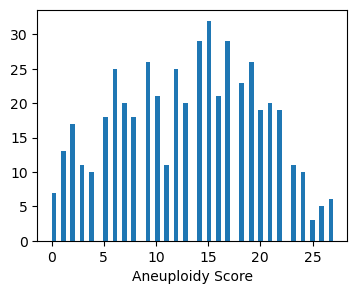

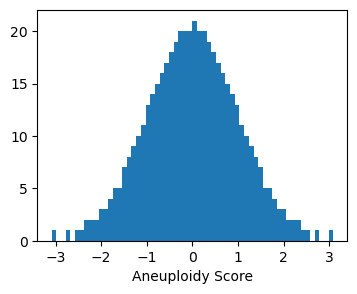

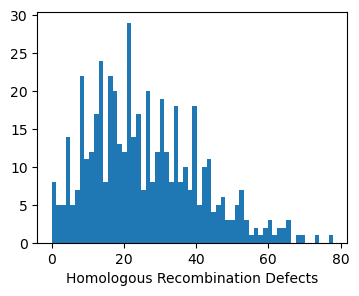

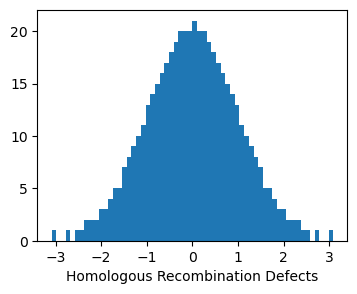

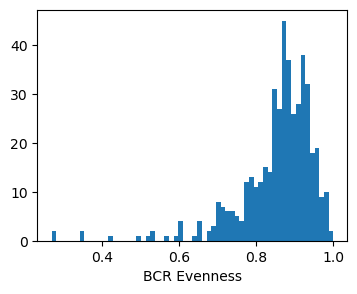

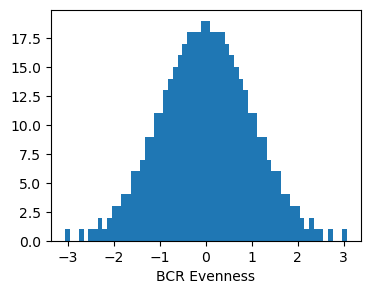

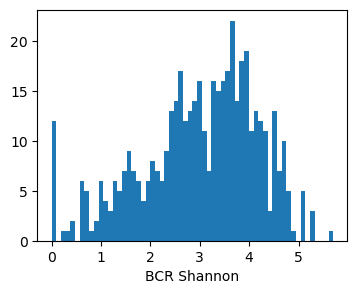

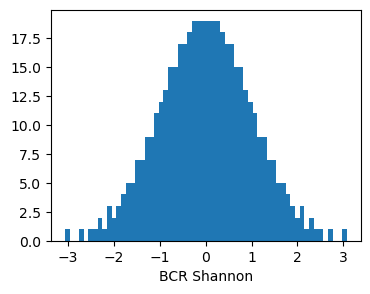

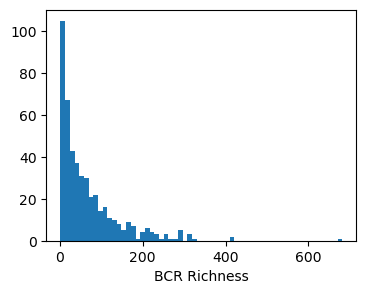

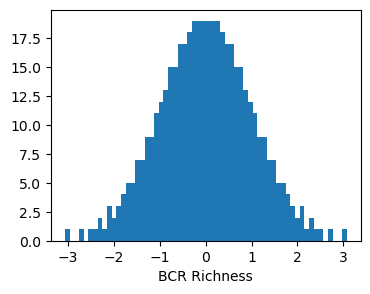

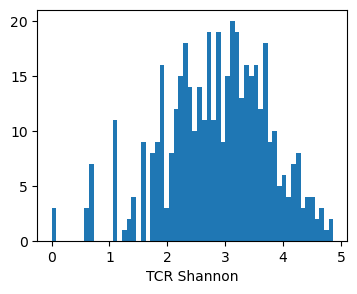

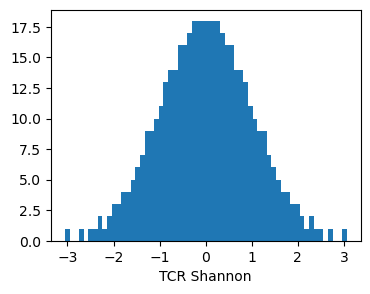

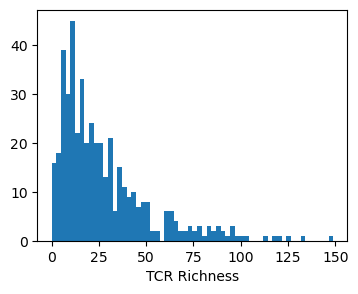

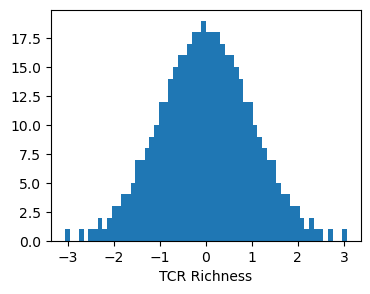

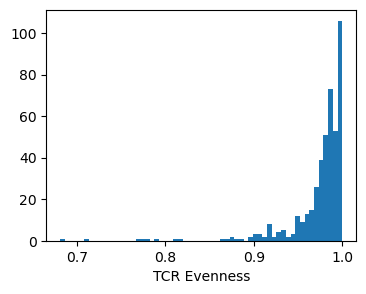

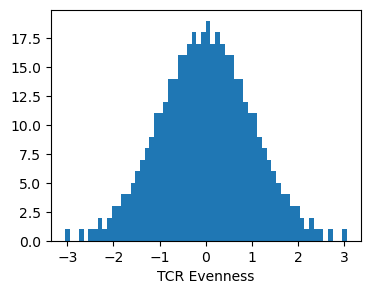

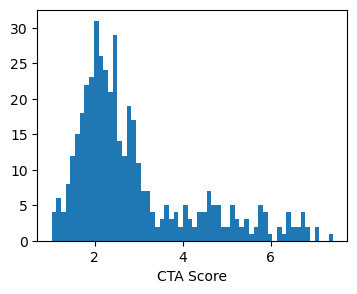

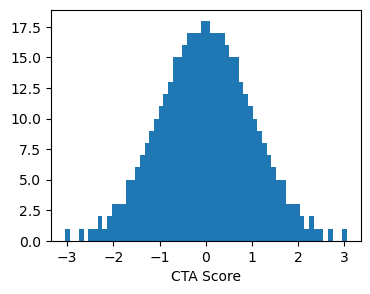

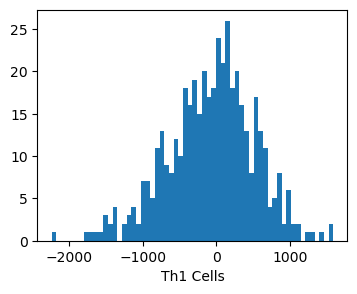

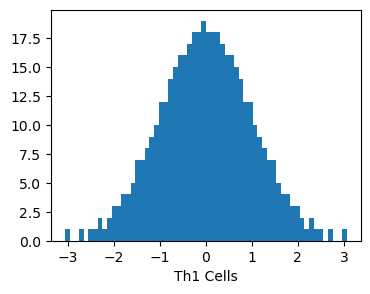

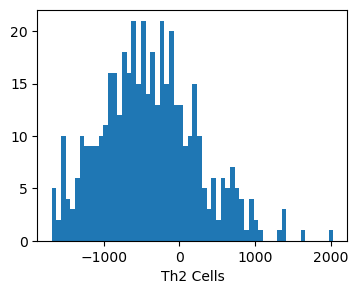

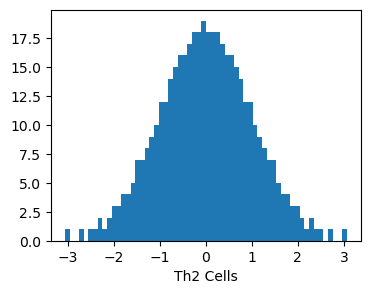

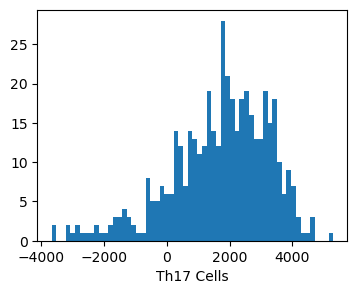

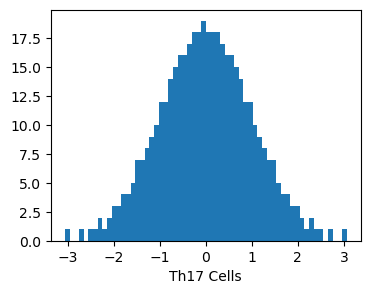

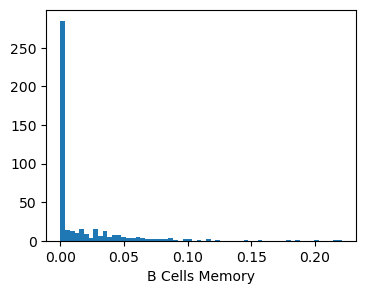

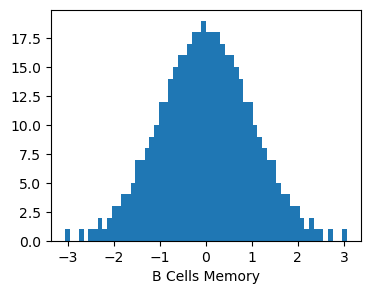

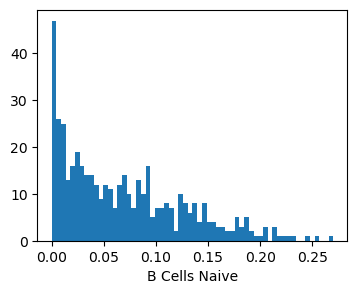

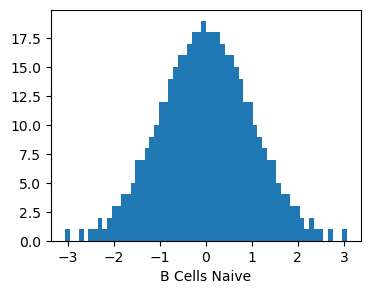

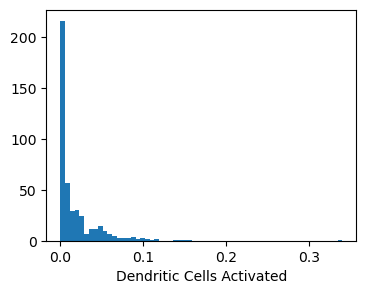

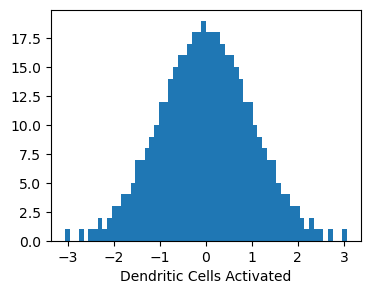

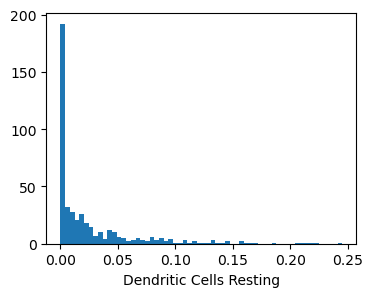

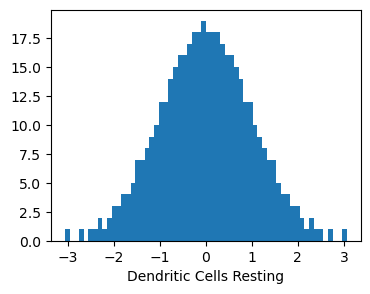

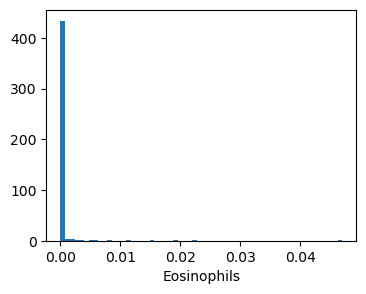

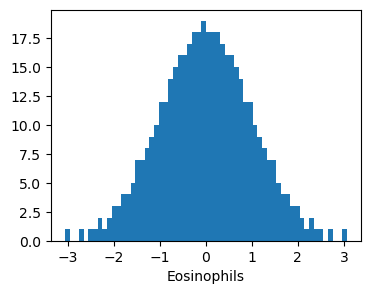

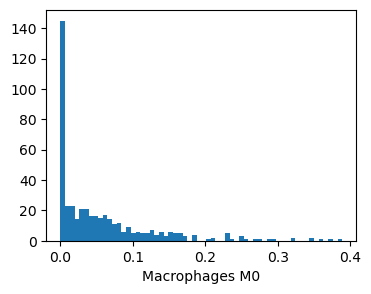

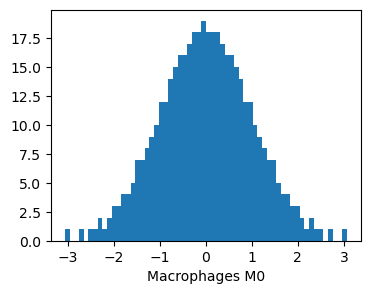

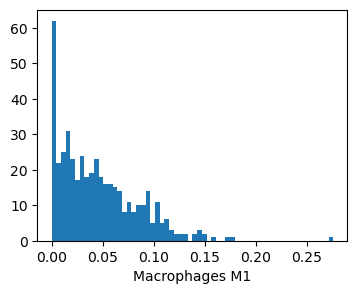

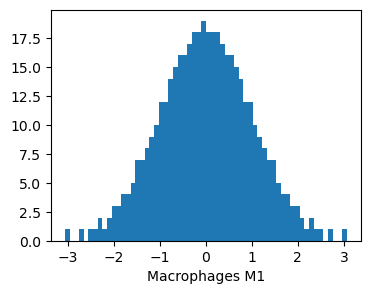

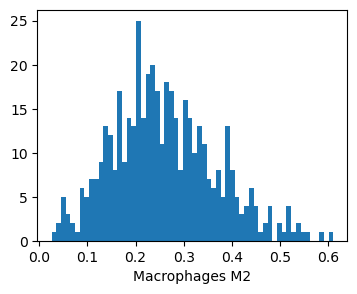

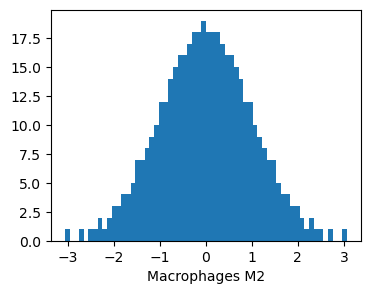

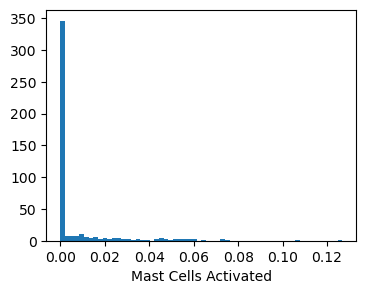

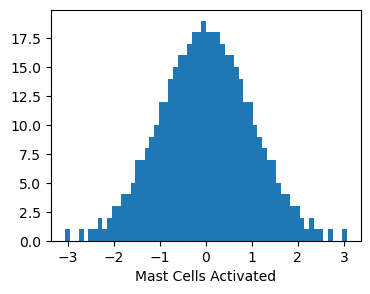

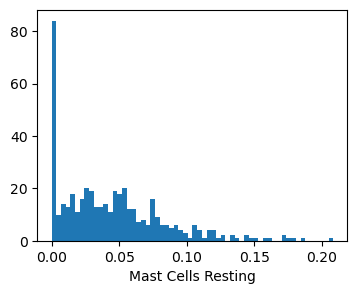

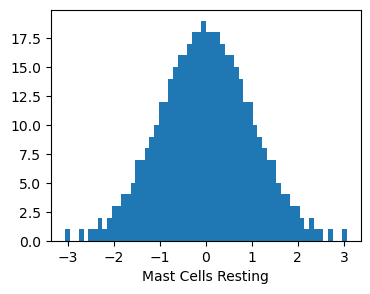

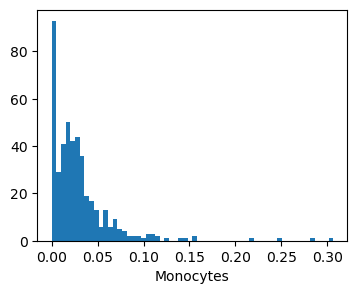

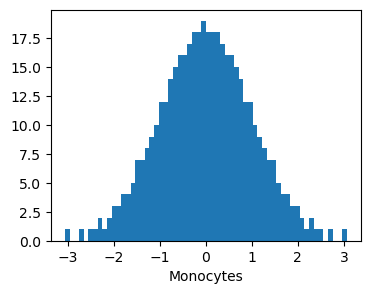

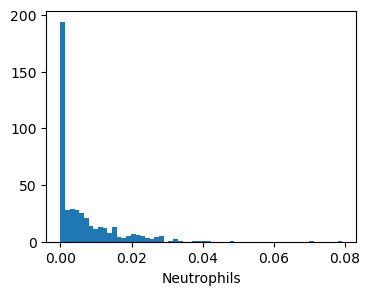

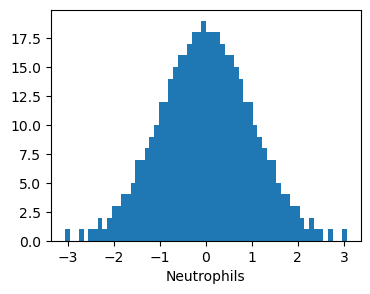

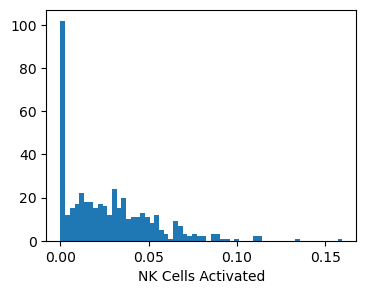

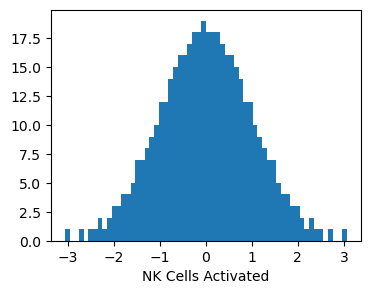

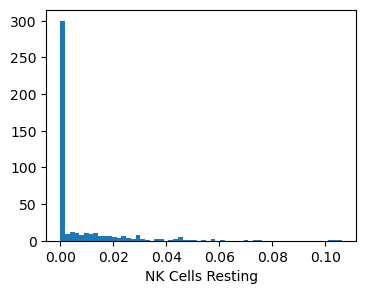

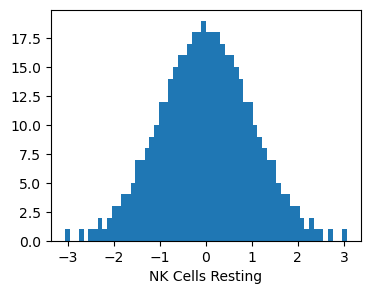

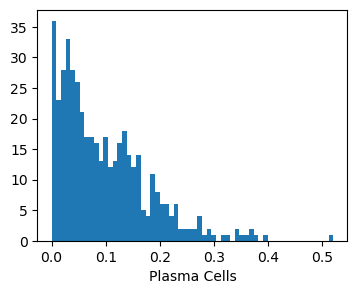

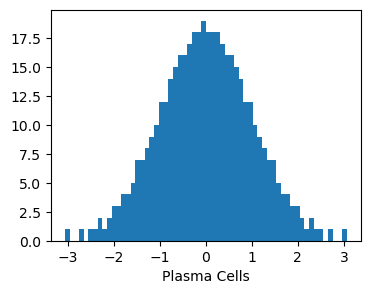

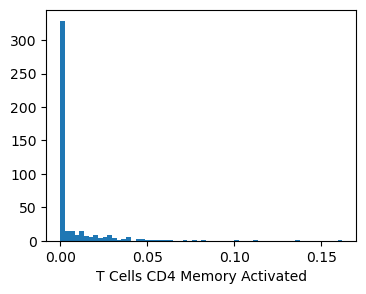

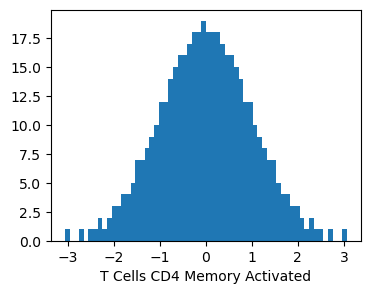

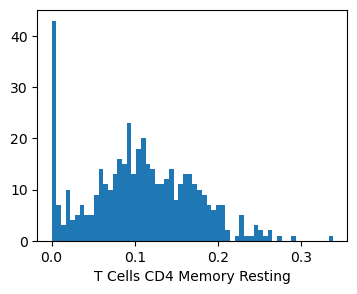

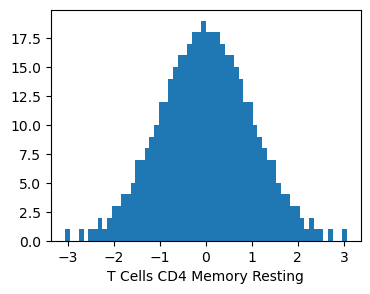

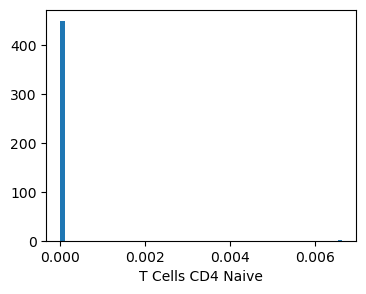

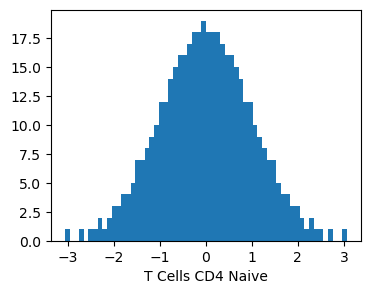

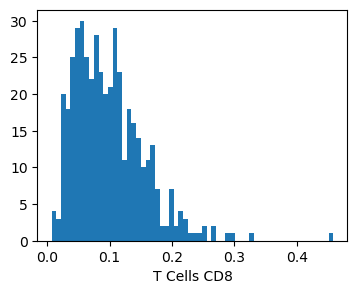

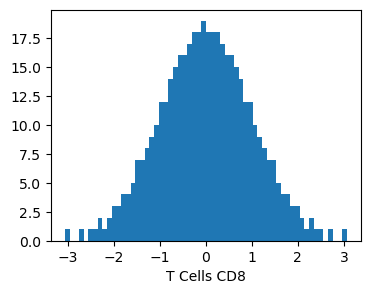

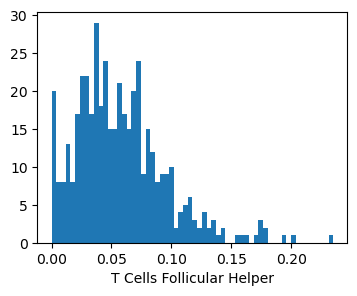

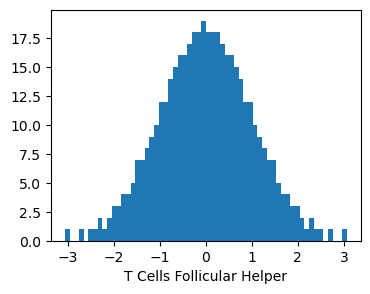

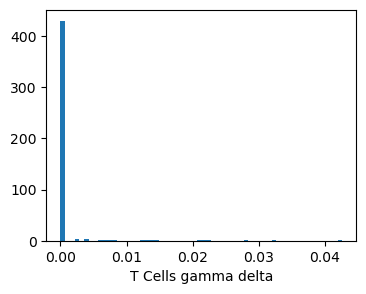

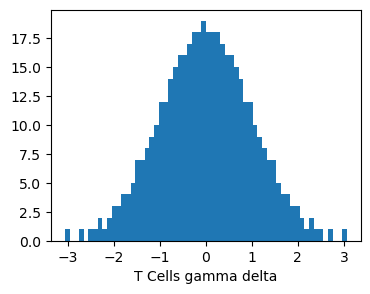

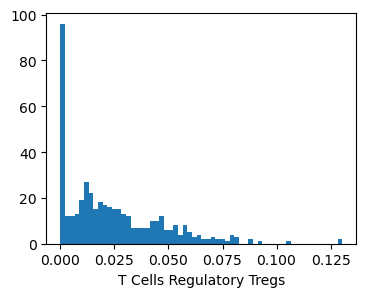

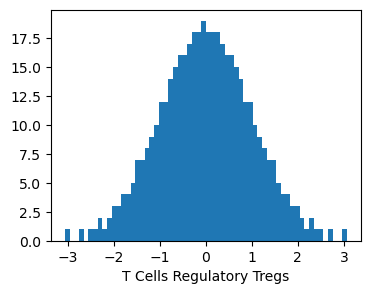

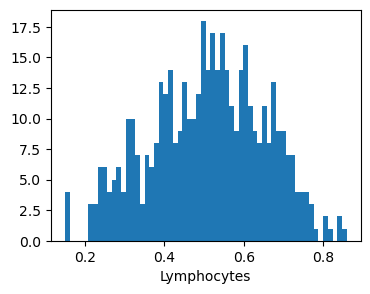

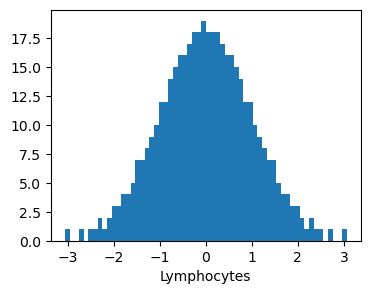

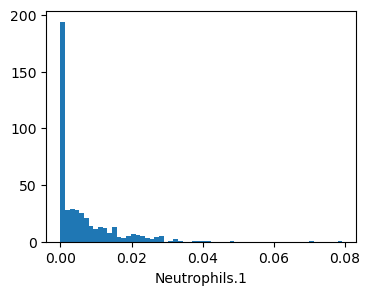

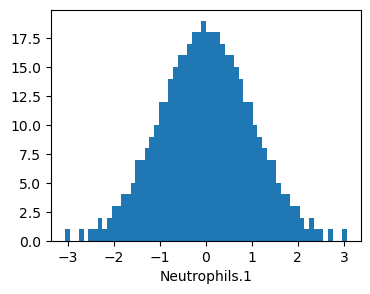

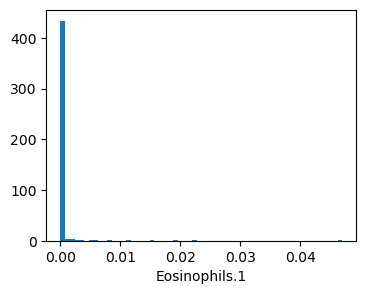

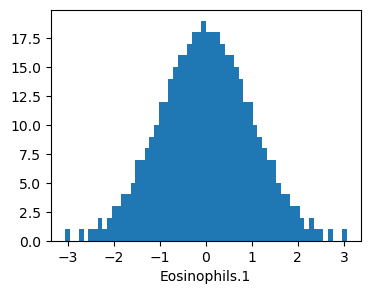

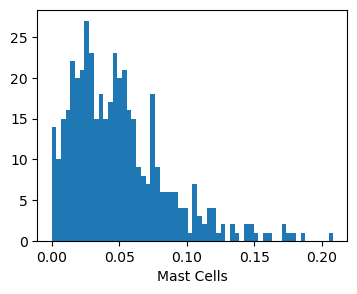

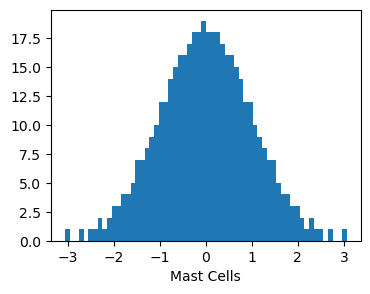

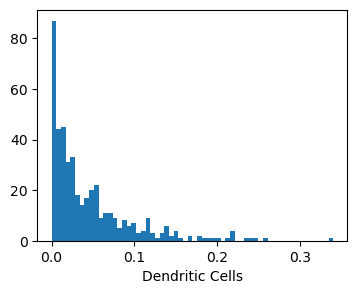

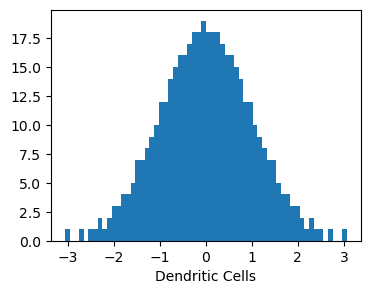

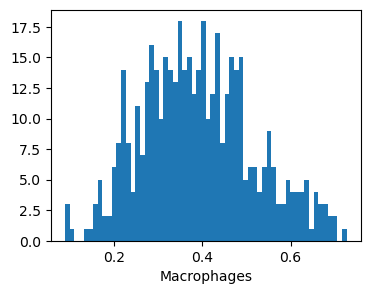

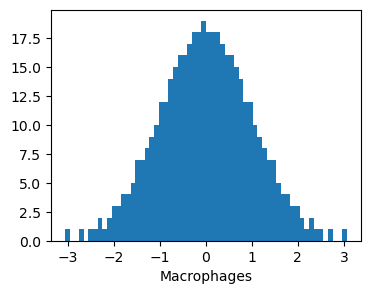

In [12]:

for column in outcomes[4:]:
        
    plt.hist(data[column], bins=60)
    plt.xlabel(column)
    plt.show()
    
        
    data_ = data.copy()
    data_ = data_.loc[~data_[column].isna(),]    
    
    
    out_data = data_[column]  

    out_data = out_data.rank(method='first').reindex_like(out_data)

    for row in out_data.index: 
        x = norm.ppf((out_data[row]-0.5)/len(out_data))
        data[column][row] = x
        
    x = data.loc[~data[column].isna(), column]    
    plt.hist(x, bins=60)
    plt.xlabel(column)
    plt.show()      


# Zero inflated SBT features ( >10%)

loadIG_ligth_chain_norm Zero portion:  83.87096774193549 % nonzero inviduals:  90


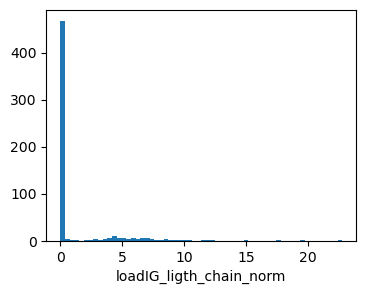

loadIG_norm Zero portion:  81.00358422939068 % nonzero inviduals:  106


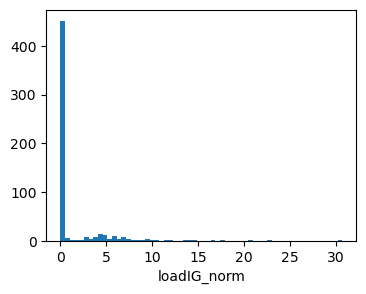

loadIGH_norm Zero portion:  96.23655913978494 % nonzero inviduals:  21


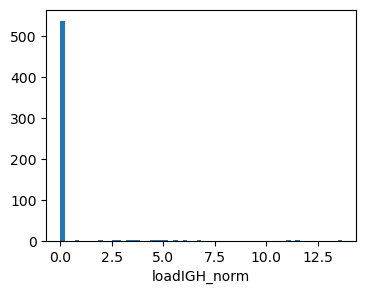

loadIGK_norm Zero portion:  87.63440860215054 % nonzero inviduals:  69


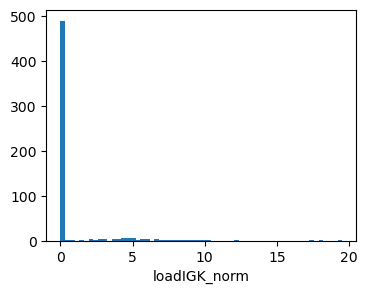

loadIGL_norm Zero portion:  95.3405017921147 % nonzero inviduals:  26


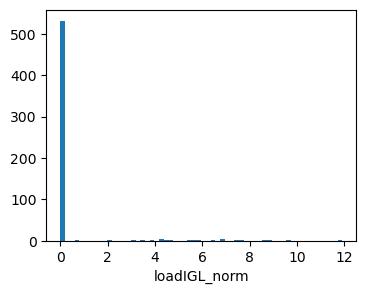

loadTCR_norm Zero portion:  33.33333333333333 % nonzero inviduals:  372


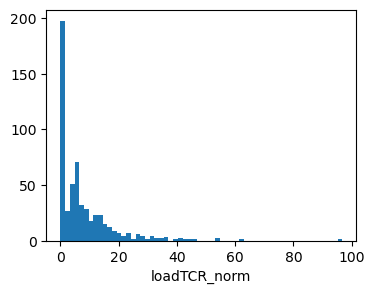

loadTCRA_norm Zero portion:  53.04659498207885 % nonzero inviduals:  262


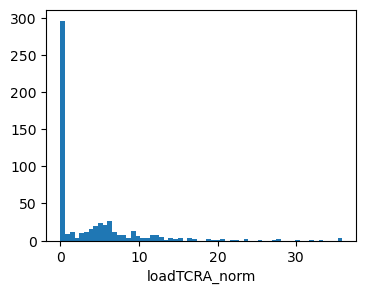

loadTCRB_norm Zero portion:  59.13978494623656 % nonzero inviduals:  228


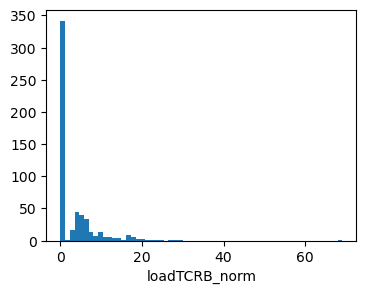

loadTCRD_norm Zero portion:  97.31182795698925 % nonzero inviduals:  15


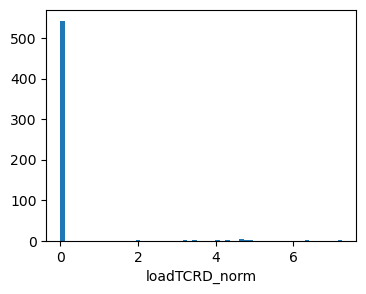

loadTCRG_norm Zero portion:  93.9068100358423 % nonzero inviduals:  34


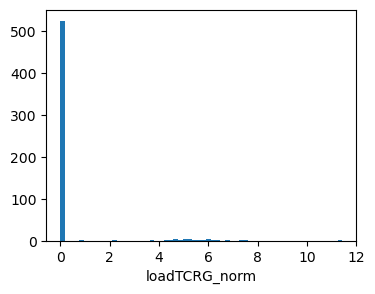

nIG_ligth_chain_norm Zero portion:  83.87096774193549 % nonzero inviduals:  90


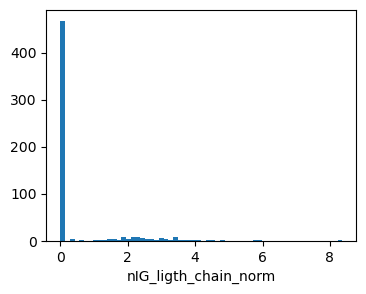

nIG_norm Zero portion:  81.00358422939068 % nonzero inviduals:  106


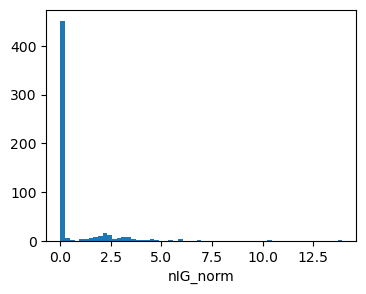

nIGH_norm Zero portion:  96.23655913978494 % nonzero inviduals:  21


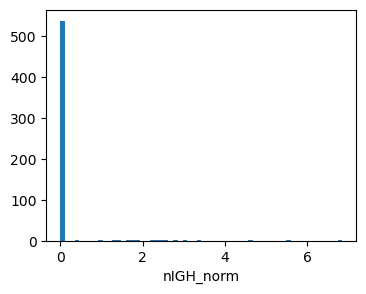

nIGK_norm Zero portion:  87.63440860215054 % nonzero inviduals:  69


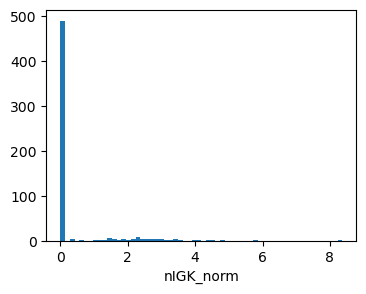

nIGL_norm Zero portion:  95.3405017921147 % nonzero inviduals:  26


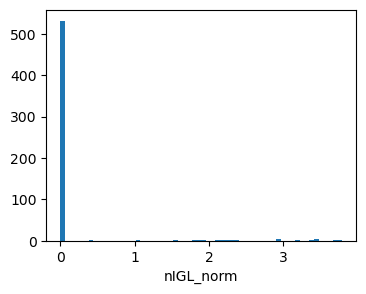

nTCR_norm Zero portion:  33.33333333333333 % nonzero inviduals:  372


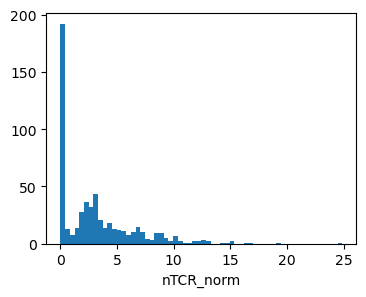

nTCRA_norm Zero portion:  53.04659498207885 % nonzero inviduals:  262


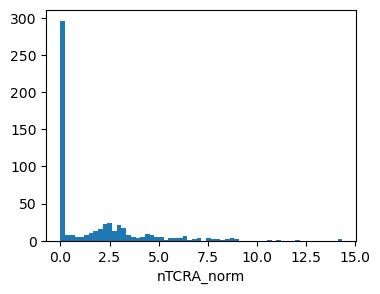

nTCRB_norm Zero portion:  59.13978494623656 % nonzero inviduals:  228


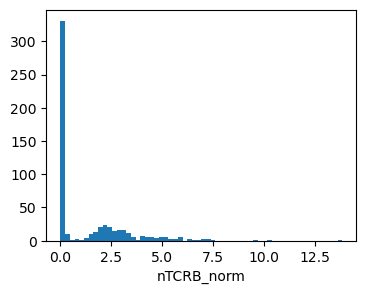

nTCRD_norm Zero portion:  97.31182795698925 % nonzero inviduals:  15


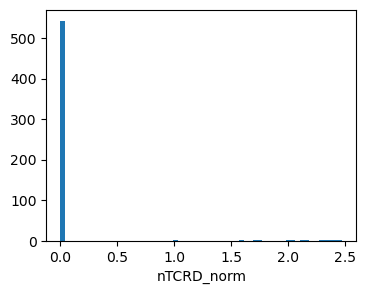

nTCRG_norm Zero portion:  93.9068100358423 % nonzero inviduals:  34


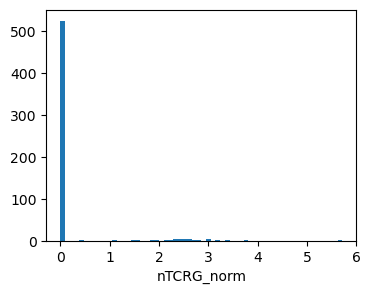

alphaIGH Zero portion:  99.46236559139786 % nonzero inviduals:  3


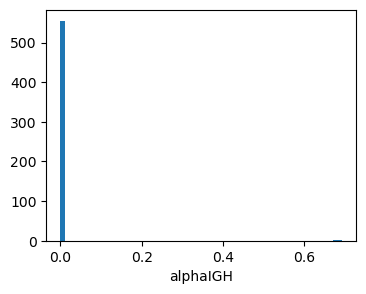

alphaIGK Zero portion:  98.2078853046595 % nonzero inviduals:  10


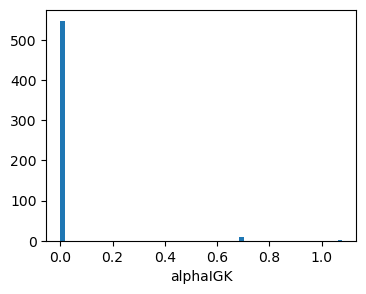

alphaIGL Zero portion:  99.82078853046595 % nonzero inviduals:  1


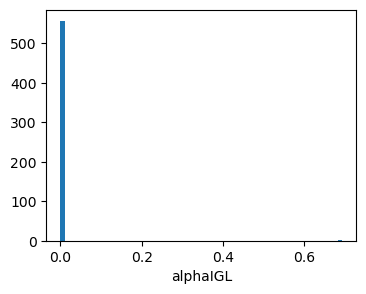

alphaTCRA Zero portion:  79.56989247311827 % nonzero inviduals:  114


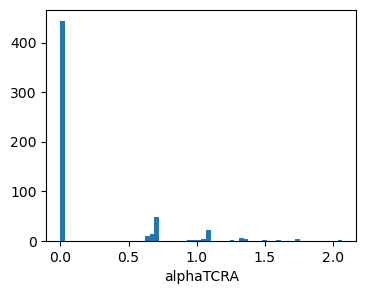

alphaTCRB Zero portion:  86.91756272401435 % nonzero inviduals:  73


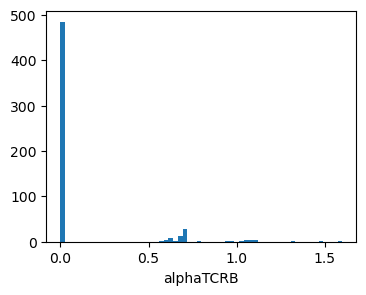

alphaTCRD Zero portion:  99.82078853046595 % nonzero inviduals:  1


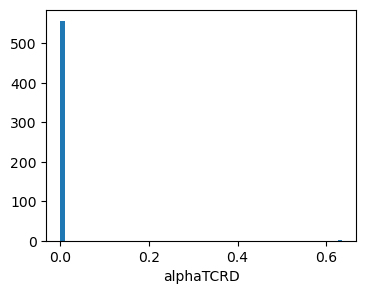

alphaTCRG Zero portion:  99.82078853046595 % nonzero inviduals:  1


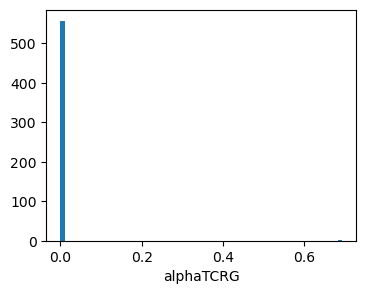

n_protozoa_norm Zero portion:  96.95340501792114 % nonzero inviduals:  17


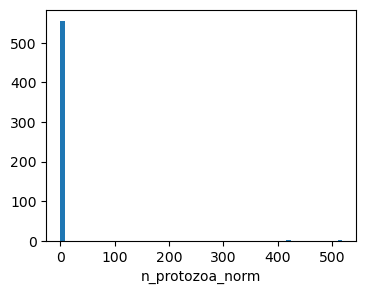

In [13]:

features_zero_inflated_ = [ 'loadIG_ligth_chain_norm','loadIG_norm','loadIGH_norm','loadIGK_norm','loadIGL_norm',
                           'loadTCR_norm','loadTCRA_norm','loadTCRB_norm','loadTCRD_norm','loadTCRG_norm',
                           'nIG_ligth_chain_norm', 'nIG_norm','nIGH_norm','nIGK_norm','nIGL_norm',
                           'nTCR_norm','nTCRA_norm','nTCRB_norm','nTCRD_norm','nTCRG_norm',
                           'alphaIGH', 'alphaIGK','alphaIGL',
                           'alphaTCRA','alphaTCRB','alphaTCRD','alphaTCRG', 'n_protozoa_norm']

features_zero_inflated = []

# number of rows
N = data.shape[0]

for feature in features_zero_inflated_:
   
    # number of zeros
    n_zeros = len(data.loc[data[feature] == 0, feature])
    
    # features and portion of zeros
    print(feature, "Zero portion: ",n_zeros/N*100, "%","nonzero inviduals: " ,N - n_zeros)
    
    if N - n_zeros > 30:
        features_zero_inflated.append(feature)
    
    plt.hist(data[feature], bins=60)
    plt.xlabel(feature)
    plt.show()
    

data_zero_inflated = data[features_zero_inflated]


## Inverse normal transformation: qnorm((rank(x,na.last="keep")-0.5)/sum(!is.na(x)))

In [14]:
data_zero_inflated_Q = data_zero_inflated.copy()

for feature in features_zero_inflated:
    
    data_feature = data_zero_inflated.loc[data_zero_inflated[feature] != 0., feature]

    data_feature = data_feature.rank(method='first').reindex_like(data_feature)

    for row in data_feature.index: 

        x = norm.ppf((data_feature[row]-0.5)/len(data_feature))
        data_zero_inflated_Q[feature][row] = x
        
#renaming columns
for feature in features_zero_inflated:
    data_zero_inflated_Q = data_zero_inflated_Q.rename(columns={feature: feature+"_Q"}, errors="raise")

## Checking new distribution - non-zero values

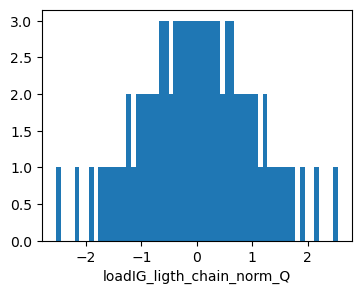

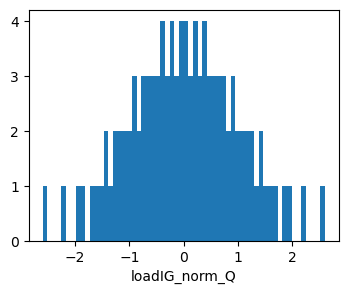

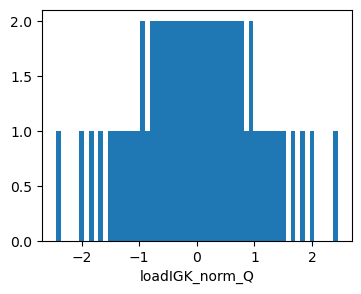

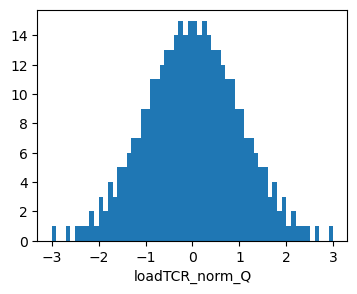

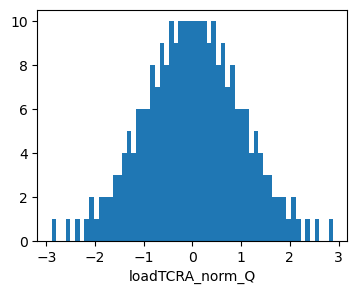

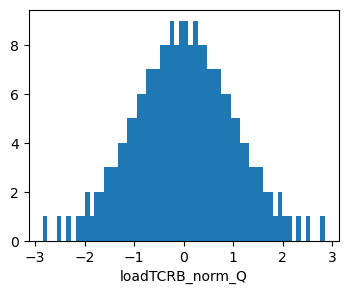

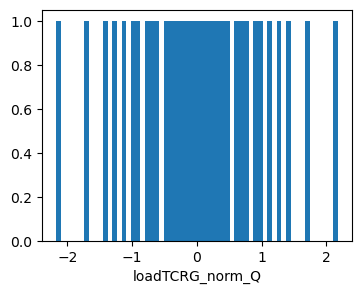

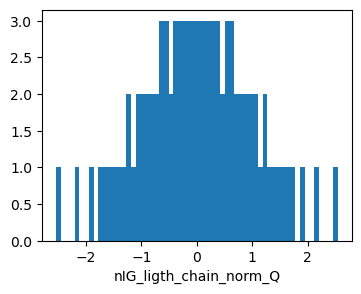

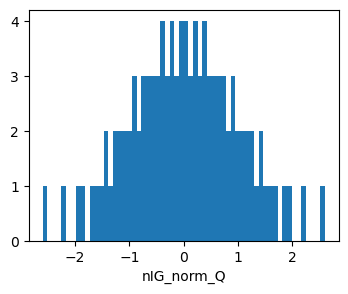

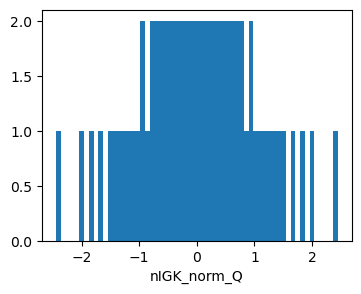

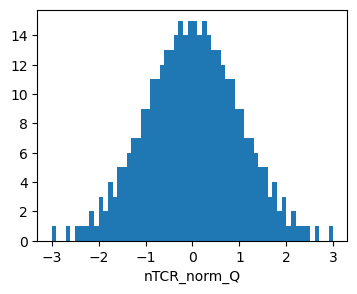

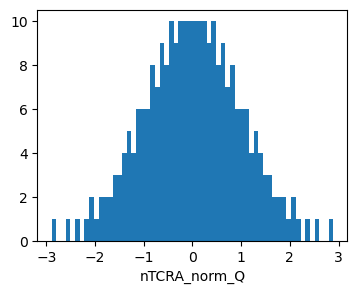

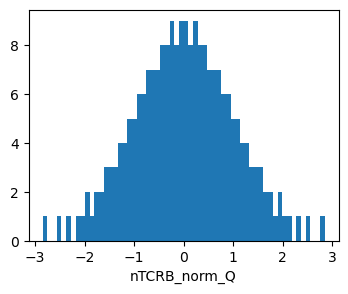

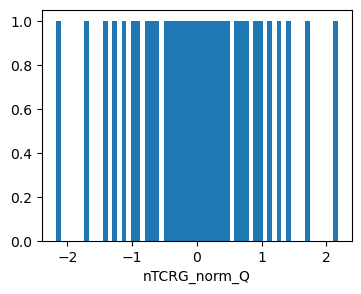

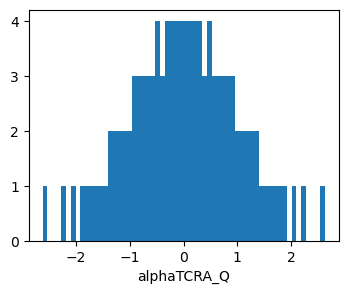

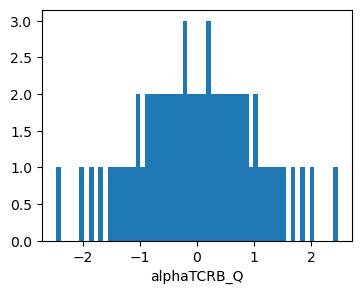

In [15]:
for feature in features_zero_inflated:
    x = data_zero_inflated_Q.loc[data_zero_inflated_Q[feature+"_Q"] != 0, feature+"_Q"]
    plt.hist(x, bins=60)
    plt.xlabel(feature+"_Q")
    plt.show()

## Dichotomous variable with 0 for zero values and 1 otherwise

In [16]:
data_zero_inflated_D = data_zero_inflated.copy()

for feature in features_zero_inflated:
    
    data_zero_inflated_D.loc[data_zero_inflated_D[feature] != 0. , feature] = 1.
    #renaming columns
    data_zero_inflated_D = data_zero_inflated_D.rename(columns={feature: feature+"_D"}, errors="raise")

# Regression

In [17]:
data_ = data.copy()

data_ = data_.join(data_zero_inflated_D, on='Sample ID')
data_ = data_.join(data_zero_inflated_Q, on='Sample ID')
data_['constant'] = 1.


#Dataframe to store results
col_names =  ['outcome', 'sbt_feature', 'pvalue', 'effect', 'std']
result  = pd.DataFrame(columns = col_names)
    

for outcome in outcomes:

    for feature in features_zero_inflated:
        
        df = data_[[outcome, 'constant', feature+"_D",  feature+"_Q", 'Tumor Purity', 'offcov']]
        df = df.dropna()
            
        y = df[outcome]
      
        
        # Y ~ v_Q*v_D + v_D + Covs
        X = np.array(df[['constant', feature+"_Q", feature+"_D", 'Tumor Purity', 'offcov']])
               
        model = sm.OLS(y,X)
        results = model.fit()
        L1 = float(results.summary2().tables[0][3][3])
        p_values = results.summary2().tables[1]['P>|t|']
        
        coefs = results.summary2().tables[1]['Coef.']
        errors = results.summary2().tables[1]['Std.Err.']
       
        effect =  coefs['x1']
        std = errors['x1']
        
        if abs(effect) < abs(coefs['x2']):
            effect =  coefs['x2']
            std = errors['x2']
        
                
        # Y ~ Covs
        X = np.array(df[['constant', 'Tumor Purity', 'offcov']])

        model = sm.OLS(y,X)
        results = model.fit()
        L2 = float(results.summary2().tables[0][3][3])
        
        chi2 = 2*(L1 - L2)        
        pvalue = 1 - stats.chi2.cdf(chi2, 2)
                
            
        result = result.append({'outcome': outcome, 
                                'sbt_feature': feature_dict_names[feature], 
                                'pvalue': pvalue, 
                                'effect': effect,
                                'std': std}, 
                                ignore_index=True)

result_zero_inflated = result

# SBT features without zero inflation

n_viral_norm Zero portion:  0.0 %


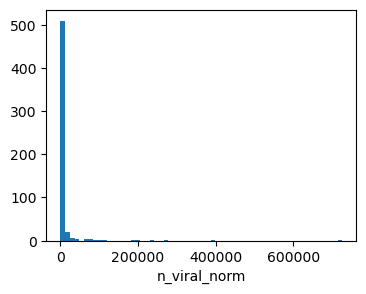

n_fungi_norm Zero portion:  0.0 %


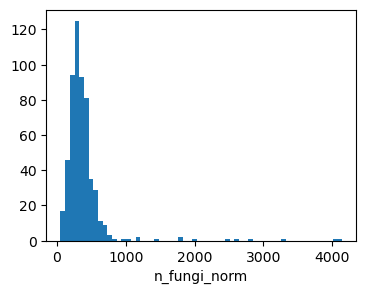

n_microbial_norm Zero portion:  0.0 %


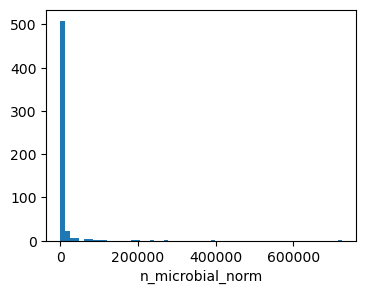

mtDNA_dosage_norm Zero portion:  0.0 %


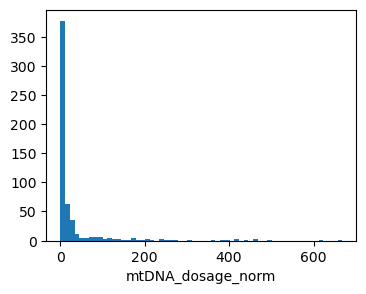

5S_dosage_norm Zero portion:  0.0 %


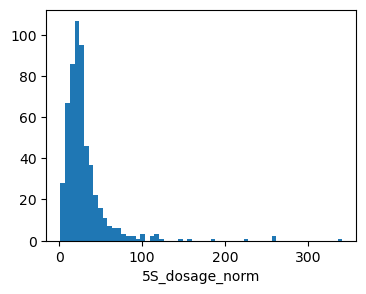

18S_dosage_norm Zero portion:  0.0 %


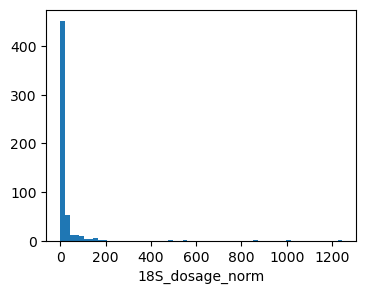

28S_dosage_norm Zero portion:  0.0 %


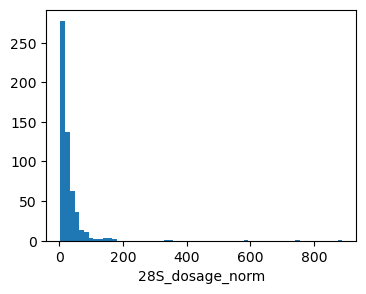

45S_dosage_norm Zero portion:  0.0 %


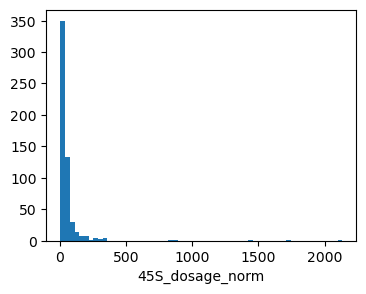

In [18]:
features_non_zero_inflated=['n_viral_norm', 'n_fungi_norm', 'n_microbial_norm', 
                            'mtDNA_dosage_norm',
                            '5S_dosage_norm',  '18S_dosage_norm',  '28S_dosage_norm',  '45S_dosage_norm']

# number of rows
N = data.shape[0]

for feature in features_non_zero_inflated:
   
    # number of zeros
    n_zeros = len(data.loc[data[feature] == 0, feature])
    
    # features and portion of zeros
    print(feature, "Zero portion: ",n_zeros/N*100,'%')
    plt.hist(data[feature], bins=60)
    plt.xlabel(feature)
    plt.show()

data_non_zero_inflated = data[features_non_zero_inflated]

## Inverse normal transformation: qnorm((rank(x,na.last="keep")-0.5)/sum(!is.na(x)))


In [19]:
data_non_zero_inflated_Q = data_non_zero_inflated.copy()

for feature in features_non_zero_inflated:
    
    data_feature = data_non_zero_inflated[feature]

    data_feature = data_feature.rank(method='first').reindex_like(data_feature)

    for row in data_feature.index: 

        x = norm.ppf((data_feature[row]-0.5)/len(data_feature))
        data_non_zero_inflated_Q[feature][row] = x
        
#renaming columns
for feature in features_non_zero_inflated:
    data_non_zero_inflated_Q = data_non_zero_inflated_Q.rename(columns={feature: feature+"_Q"}, errors="raise")    

## Checking new distribution 

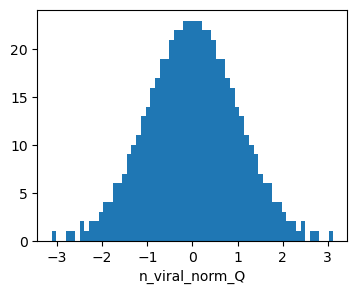

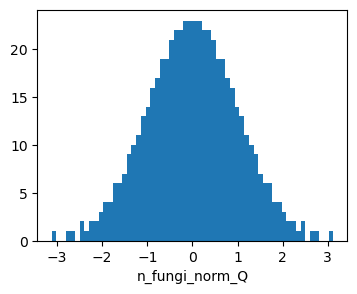

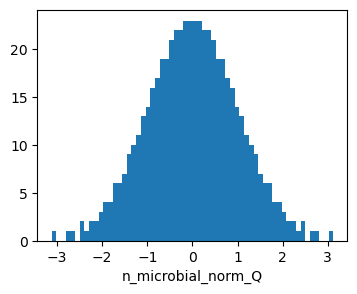

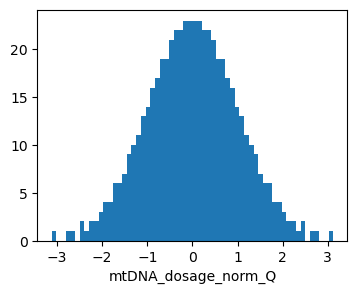

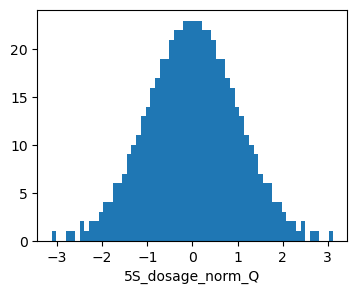

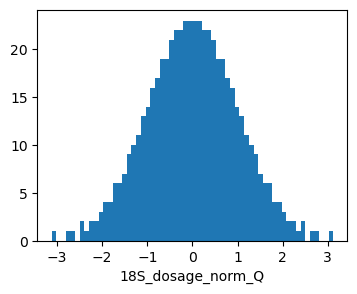

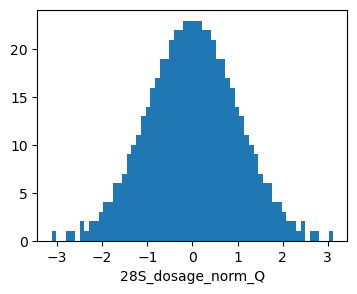

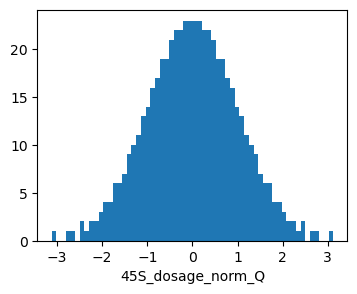

In [20]:
for feature in features_non_zero_inflated:
    
    plt.hist(data_non_zero_inflated_Q[feature+"_Q"], bins=60)
    plt.xlabel(feature+"_Q")
    plt.show()

## Dichotomous variable with 0 for the bottom 85% of data and 1 for the top 15% 

In [21]:
N = data_non_zero_inflated.shape[0]

data_non_zero_inflated_D = data_non_zero_inflated.rank()/N

for feature in features_non_zero_inflated:
    
    data_non_zero_inflated_D.loc[data_non_zero_inflated_D[feature] < 0.85, feature] = 0.
    data_non_zero_inflated_D.loc[data_non_zero_inflated_D[feature] >= 0.85, feature] = 1.
    data_non_zero_inflated_D = data_non_zero_inflated_D.rename(columns={feature: feature+"_D"}, errors="raise")

# Regression

In [22]:
data_ = data.copy()

data_ = data_.join(data_non_zero_inflated_D, on='Sample ID')
data_ = data_.join(data_non_zero_inflated_Q, on='Sample ID')
data_['constant'] = 1.


#Dataframe to store results
col_names =  ['outcome', 'sbt_feature',  'effect', 'pvalue', 'std']
result  = pd.DataFrame(columns = col_names)
    
    
import scipy.stats as stats

for outcome in outcomes:
    
        
    for feature in features_non_zero_inflated:     
        
        df = data_[[outcome, 'constant', feature+"_Q", feature+"_D",  'Tumor Purity', 'offcov']]
        df = df.dropna()

        y = df[outcome]
      
        
        # Y ~ Q_v + Covs
        X = np.array(df[['constant', feature+"_Q", 'Tumor Purity', 'offcov']])
               
        model = sm.OLS(y,X)
        results = model.fit()
        
        p_values_Q = results.summary2().tables[1]['P>|t|']
        coefs_Q = results.summary2().tables[1]['Coef.']
        errors_Q = results.summary2().tables[1]['Std.Err.']

            
        result = result.append({'outcome': outcome, 
                                'sbt_feature': feature_dict_names[feature], 
                                'effect': coefs_Q['x1'], 
                                'pvalue': p_values_Q['x1'], 
                                'std': errors_Q['x1']}, 
                                ignore_index=True)

result_non_zero_inflated = result

In [23]:
df = pd.concat([result_non_zero_inflated, result_zero_inflated])

N = len(outcomes)

df['label'] = '*'
df.loc[df['pvalue'] > 0.05, 'label'] = ''
df.loc[df['pvalue'] < 0.05, 'label'] = '*'
df.loc[df['pvalue'] < 0.01, 'label'] = '**'
df.loc[df['pvalue'] < 0.05/N, 'label'] = '***'

df['z'] = abs(stats.norm.isf(df['pvalue']/2, loc =0, scale = 1))*df['effect']/abs(df['effect'])


df.to_csv('../summary_data/association_results_tcga-luad_wxs.csv', index=False)

# Fig 2 - OP-LUAD WXS association heatmap

In [24]:
df = pd.read_csv('../summary_data/association_results_tcga-luad_wxs.csv')

df.loc[df['label'].isna(), 'label'] = ''

df.loc[(df['pvalue'] == 0) & (df['effect'] < 0), 'z'] = - 4
df.loc[(df['pvalue'] == 0) & (df['effect'] > 0), 'z'] = 4.

sbt_features = set(df['sbt_feature'])

for feature in sbt_features:
    
    L = len(df.loc[(df['label'] != '') & (df['sbt_feature'] == feature) ,])

    if L == 0:
        df = df.loc[~ (df['sbt_feature'] == feature),]

for outcome in outcomes[:-1]:
    
    L = len(df.loc[(df['label'] != '') & (df['outcome'] == outcome) ,])

    if L == 0:
        df = df.loc[~ (df['outcome'] == outcome),]
        

df = df.sort_values(by=['sbt_feature'])

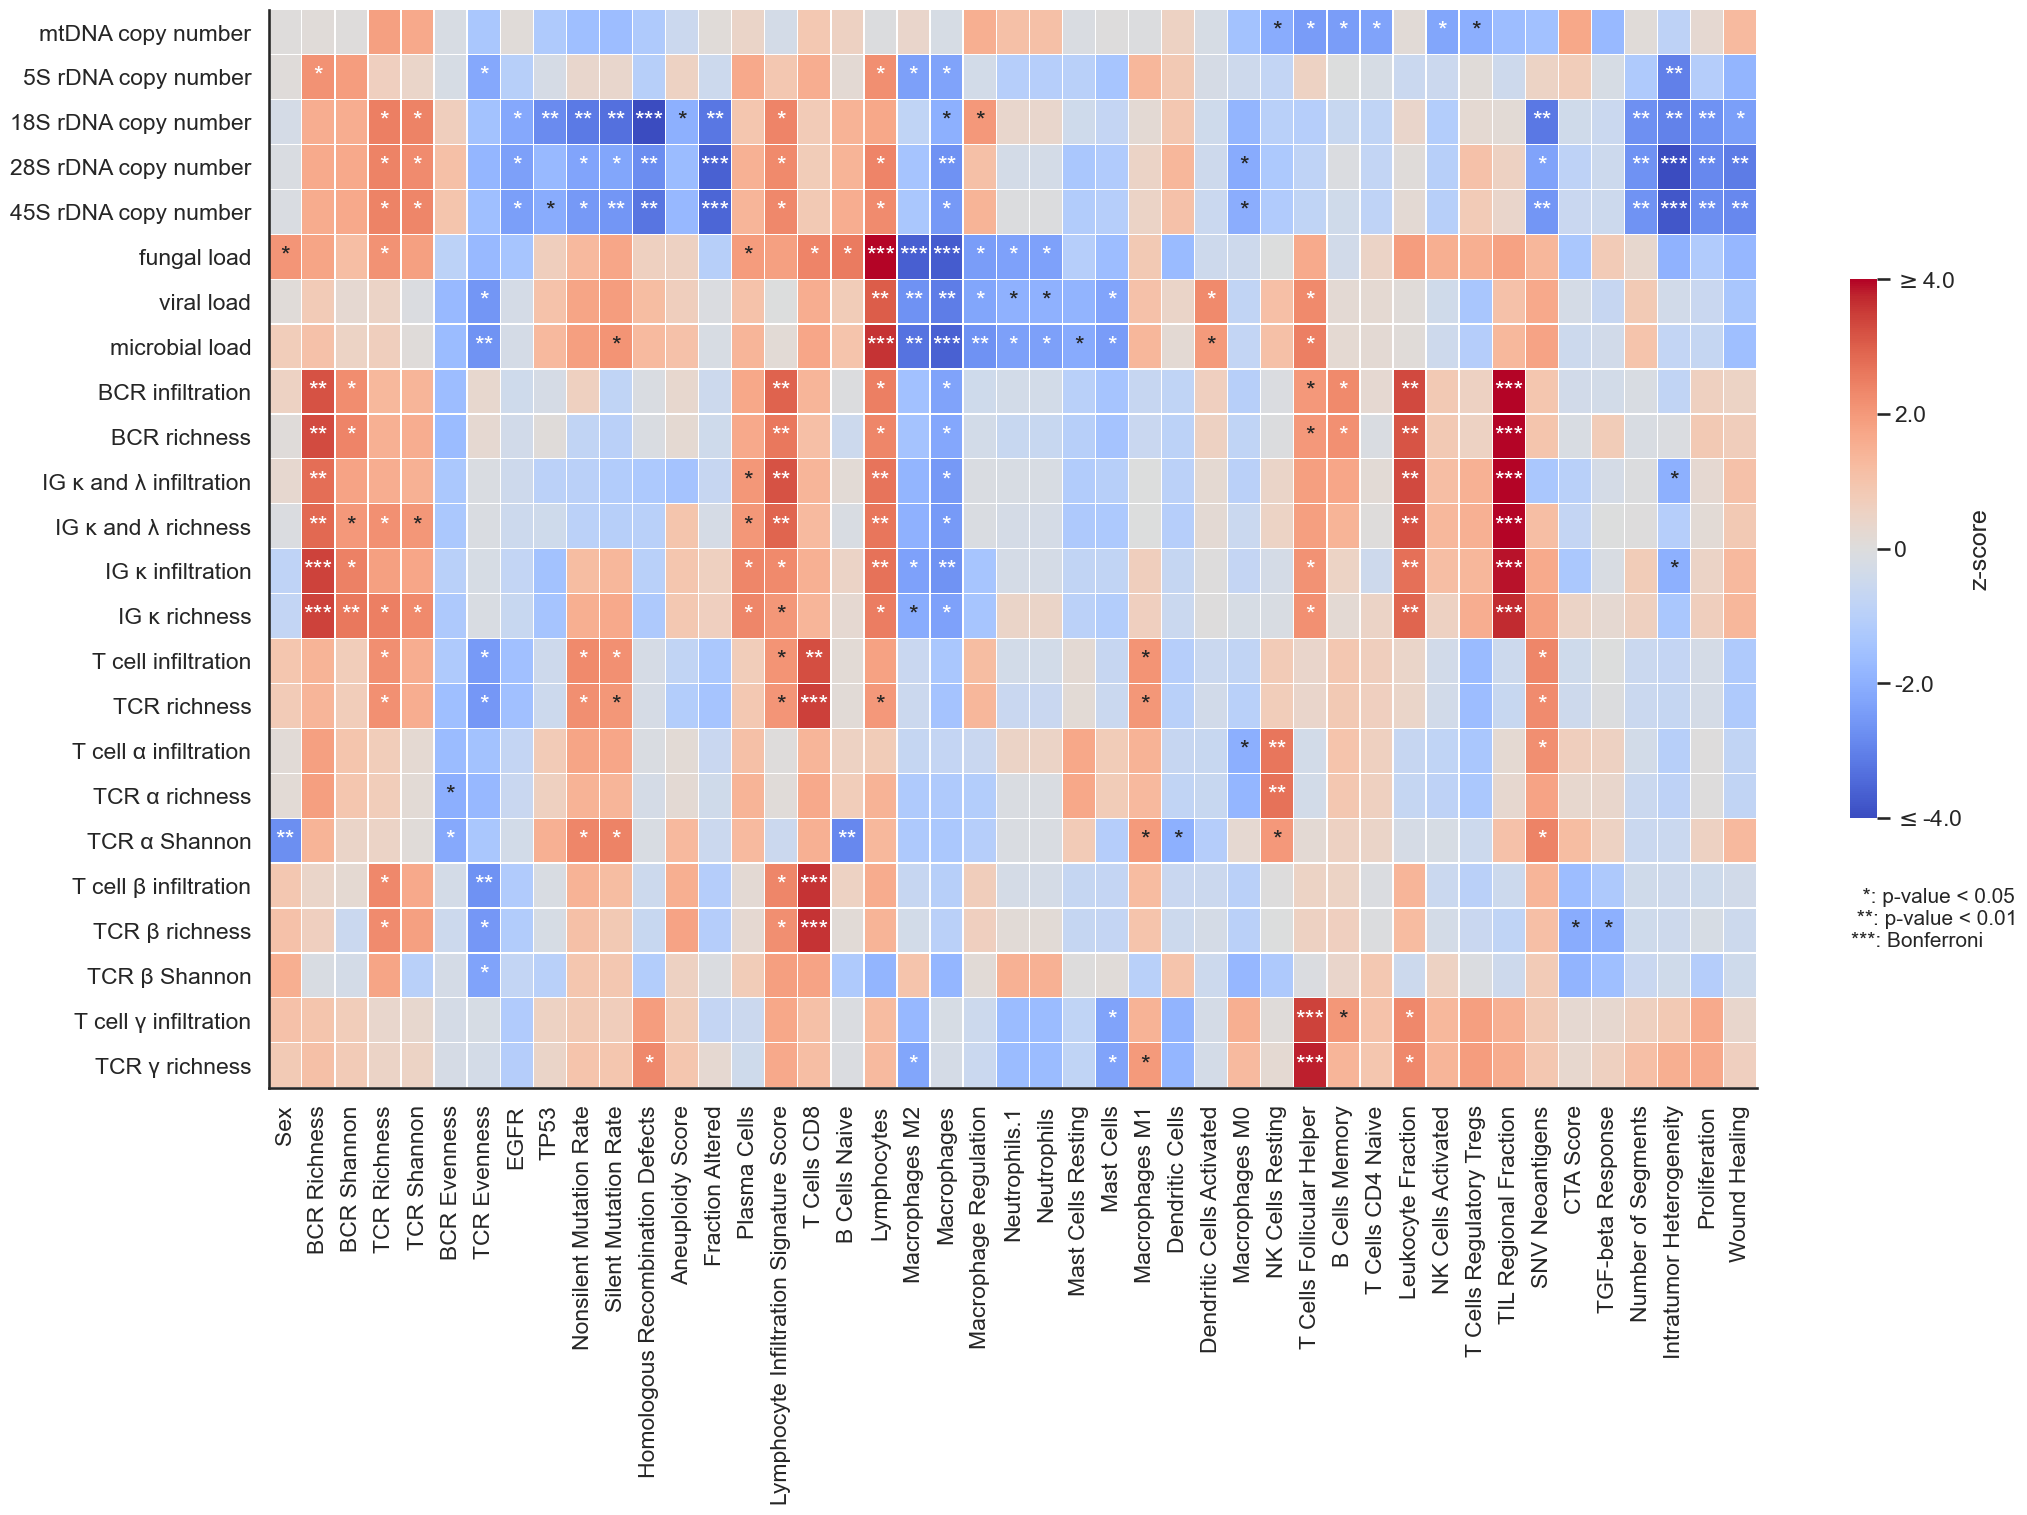

In [25]:
import seaborn as sns

plt.rcParams.update({'font.size': 12})


row_order = ['mtDNA copy number', 
             '5S rDNA copy number',  '18S rDNA copy number', 
             '28S rDNA copy number',  '45S rDNA copy number', 
             'fungal load',  'viral load', 'microbial load', 
             'BCR infiltration', 'BCR richness', 
             'IG κ and λ infiltration', 'IG κ and λ richness', 'IG κ infiltration', 'IG κ richness', 
             'T cell infiltration', 'TCR richness', 'T cell α infiltration', 'TCR α richness', 'TCR α Shannon', 
             'T cell β infiltration', 'TCR β richness', 'TCR β Shannon', 'T cell γ infiltration', 'TCR γ richness']

column_order = ['Sex',
                'BCR Richness', 'BCR Shannon',  'TCR Richness', 'TCR Shannon','BCR Evenness', 'TCR Evenness',
                'EGFR','TP53', 'Nonsilent Mutation Rate', 'Silent Mutation Rate', 'Homologous Recombination Defects', 
                'Aneuploidy Score', 'Fraction Altered', 'Plasma Cells', 'Lymphocyte Infiltration Signature Score', 
                'T Cells CD8',  'B Cells Naive', 'Lymphocytes', 'Macrophages M2', 'Macrophages', 
                'Macrophage Regulation', 'Neutrophils.1', 'Neutrophils', 'Mast Cells Resting', 'Mast Cells', 
                'Macrophages M1', 'Dendritic Cells', 'Dendritic Cells Activated', 'Macrophages M0',   
                'NK Cells Resting', 'T Cells Follicular Helper', 'B Cells Memory', 'T Cells CD4 Naive',  
                'Leukocyte Fraction',  'NK Cells Activated', 'T Cells Regulatory Tregs',
                'TIL Regional Fraction','SNV Neoantigens', 'CTA Score', 'TGF-beta Response', 'Number of Segments',   
                'Intratumor Heterogeneity',  'Proliferation',   'Wound Healing' ]
                           
                   
result = df.pivot(index='sbt_feature', columns='outcome', values='z').reindex(column_order, axis=1)
result = result.reindex(row_order, axis=0)

labels = df.pivot(index='sbt_feature', columns='outcome', values='label').reindex(column_order, axis=1)
labels = labels.reindex(row_order, axis=0)

sns.set_style("white")
sns.set_context("talk")

fig, ax = plt.subplots(1)
fig = plt.gcf()
fig.set_size_inches(24,14)

g=sns.heatmap(result, 
              cmap='coolwarm',
              linewidths=.2,
              annot=labels,
              vmin=-4,
              vmax=4,
              fmt="",
              cbar_kws={'label': 'z-score' , "shrink": 0.5},
             
)

g.text(47.85, 20.85,'  *: p-value < 0.05\n **: p-value < 0.01\n***: Bonferroni', fontsize=15)
colorbar = ax.collections[0].colorbar

colorbar.set_ticks([-4.0, -2., 0, 2., 4.0])
colorbar.set_ticklabels([r'$\leq$-4.0', '-2.0' ,'0', '2.0', r'$\geq$4.0'])

g.set(xlabel='', ylabel='')

sns.despine()


plt.savefig('../figures/Fig2_association_heatmap_tcga-luad_wxs.png', bbox_inches='tight')